### Module Import

In [2]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

### Load Image

In [67]:
file = "./lena_raw_512x512.raw"
file_ID = open(file, "rb")
img_Lena = np.fromfile(file_ID, dtype = 'uint8', sep = "")
img_Lena = np.reshape(img_Lena, [512, 512])

file = "./BOAT512.raw"
file_ID = open(file, "rb")
img_Boat = np.fromfile(file_ID, dtype = 'uint8', sep = "")
img_Boat = np.reshape(img_Boat, [512, 512])

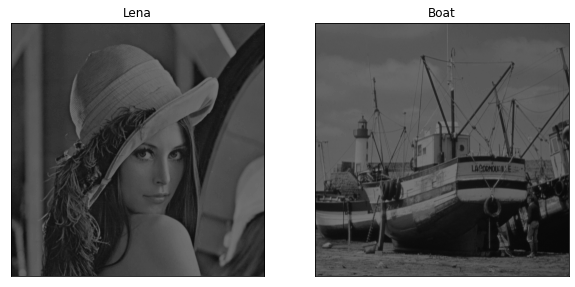

In [68]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Lena, cmap='gray', vmin=0, vmax=500)
plt.title('Lena')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Boat, cmap='gray', vmin=0, vmax=500)
plt.title('Boat')
plt.xticks([])
plt.yticks([])

plt.show()

### DCT

#### 8x8 Forward DCT

In [69]:
def forwardDCT_1D(img_block):
    block_size = img_block.shape[0]
    pi = 3.141592653589793238

    result_array = []

    for u in range(block_size):
        if u == 0:
            k_u = 1 / math.sqrt(block_size)
        else:
            k_u = math.sqrt(2/block_size)
            
        sum = 0.0
        for x in range(block_size):
            sum = sum + (img_block[x] * math.cos((2*x + 1) * u * pi / (2 * block_size)))
        
        result = k_u * sum
        result_array.append(result)
    
    result_array = np.array(result_array, dtype='int')

    return result_array


In [70]:
def inverseDCT_1D(img_block):
    block_size = img_block.shape[0]
    pi = 3.141592653589793238

    result_array = []

    for x in range(block_size):
        result = 0.0

        for u in range(block_size):
            if u == 0:
                k_u = 1 / math.sqrt(block_size)
            else:
                k_u = math.sqrt(2/block_size)
            result = result + (k_u * img_block[u] * math.cos((2*x + 1) * u * pi / (2 * block_size)))

        result_array.append(result)
    
    result_array = np.array(result_array, dtype='int')

    return result_array

In [71]:
def forwardDCT_2D(img_block):
    row, col = img_block.shape

    result_Array_vert = np.zeros(shape = (row, col))
    for i in range(row):
        result_Array_vert[i, :] = forwardDCT_1D(img_block[i])

    result_Array_horiz = result_Array_vert.T
    for i in range(col):
        result_Array_horiz[i, :] = forwardDCT_1D(result_Array_horiz[i])

    return result_Array_horiz

In [72]:
def inverseDCT_2D(img_block):
    row, col = img_block.shape

    result_Array_vert = np.zeros(shape = (row, col))
    for i in range(row):
        result_Array_vert[i, :] = inverseDCT_1D(img_block[i])

    result_Array_horiz = result_Array_vert.TW
    for i in range(col):
        result_Array_horiz[i, :] = inverseDCT_1D(result_Array_horiz[i])

    return result_Array_horiz

### Test_Lena

#### Forward DCT

In [77]:
row, col = img_Lena.shape
img_Forward_DCT_Lena = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Lena[i:i+block_size, j:j+block_size]
        block_DCT = forwardDCT_2D(block)
        img_Forward_DCT_Lena[i:i+block_size, j:j+block_size] = block_DCT

#### Inverse DCT

In [76]:
row, col = img_Forward_DCT_Lena.shape
img_Inverse_DCT_Lena = np.zeros(shape = (row, col))
block_size = 8

for i in range(0, row, block_size):
    for j in range(0, col, block_size):
        block = img_Forward_DCT_Lena[i:i+block_size, j:j+block_size]
        block_DCT = inverseDCT_2D(block)
        img_Inverse_DCT_Lena[i:i+block_size, j:j+block_size] = block_DCT

NameError: name 'img_Forward_DCT_Lena' is not defined

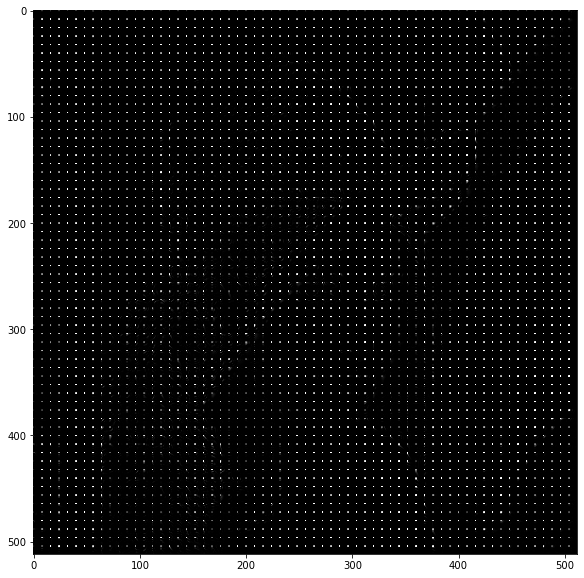

In [75]:
fig = plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(img_Lena, cmap='gray', vmin=0, vmax=500)
plt.title('Lena_Forward_DCT')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img_Boat, cmap='gray', vmin=0, vmax=500)
plt.title('Lena_Inverse_DCT')
plt.xticks([])
plt.yticks([])

plt.show()

### Test_Boat

### Save iamge

In [ ]:
save_result = Image.fromarray(result)

dir_path = "./Result"
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
save_result.save("./Result/result_DCT_new1.bmp", 'BMP')